Python Libraries Used

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from matplotlib.cm import get_cmap
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import learning_curve



In [130]:
df= pd.read_csv(r"C:\Users\MostafaShehab\Desktop\Machine Learning\ML Project\mydata.csv")
df.drop("time", axis=1, inplace=True)
Features = df.drop("accident_severity", axis=1)  
Y = df["accident_severity"]
label_encoder = LabelEncoder()
TargetVariable = label_encoder.fit_transform(df["accident_severity"])
#--------------------------------------------------------------------------------------------------------------------------
unique_labels = label_encoder.classes_
# Get the corresponding numeric values for each categorical value
numeric_values = label_encoder.transform(unique_labels)

# Print the categorical values along with their corresponding numeric values
for label, numeric_value in zip(unique_labels, numeric_values):
    print(f"{label}: {numeric_value}")


Fatal: 0
Serious: 1
Slight: 2


To classify the severity of accidents, you must first determine the target variable column in the traffic dataset. The "accident_severity" column would be the target variable in this case. This column contains information about each accident's severity, which is the variable you wish to predict or classify.



Comparison between models without diagnostics

In [16]:
def knn(Features, TargetVariable):
    knn = KNeighborsClassifier()
    X_train, X_test, y_train, y_test = train_test_split(Features, TargetVariable, test_size=0.25, random_state=42)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracyscore = accuracy_score(y_test, y_pred)
    return accuracyscore

def naive(Features, TargetVariable):
    naive_bayes = GaussianNB()
    X_train, X_test, y_train, y_test = train_test_split(Features, TargetVariable, test_size=0.25, random_state=42)
    naive_bayes.fit(X_train, y_train)
    y_pred = naive_bayes.predict(X_test)
    accuracyscore = accuracy_score(y_test, y_pred)
    return accuracyscore

def logistic_regression(Features, TargetVariable):
    logistic_regression = LogisticRegression()
    X_train, X_test, y_train, y_test = train_test_split(Features, TargetVariable, test_size=0.25, random_state=42)
    logistic_regression.fit(X_train, y_train)
    y_pred = logistic_regression.predict(X_test)
    accuracyscore = accuracy_score(y_test, y_pred)
    return accuracyscore

def neural_networks(Features, TargetVariable):
    neural_networks = MLPClassifier()
    X_train, X_test, y_train, y_test = train_test_split(Features, TargetVariable, test_size=0.25, random_state=42)
    neural_networks.fit(X_train, y_train)
    y_pred = neural_networks.predict(X_test)
    accuracyscore = accuracy_score(y_test, y_pred)
    return accuracyscore





In [17]:
knn(Features,TargetVariable)

0.8276267683993006

In [18]:
naive(Features, TargetVariable)

0.45878238753775236

In [19]:
logistic_regression(Features, TargetVariable)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8490542044190112

In [20]:
neural_networks(Features, TargetVariable)

0.8490542044190112

# Results:
* KNN - 83%
* Naive - 46%
* logistic Regression - 85%
* Neural Network - 85%
----------------------------------------------------------------------------------------------------------------
* The lowest accuracy was achieved by Naive-Bays.Naive Bayes can find it difficult to capture complicated relationships between features, particularly when they are dependent.Naive Bayes performs best when there is a large amount of training data available.
*Knn and logistic regression and neural network they all perform the same around 84%
*Logistic Regression is a well-known linear classifier that performs effectively when the relationship between features and the target variable is roughly linear.
*Neural Networks are strong models capable of detecting complex patterns and correlations in data.
*KNN is a simple yet powerful classification method recognised for capturing local patterns in data. 

------------------------------------------------------------------------------------------------------------------------------

# Comparison between models with diagnostics

# Kfold - KNN

In [21]:
def cross_validation(X,Y):
    #Common value for K is 10
    
    classifier = KNeighborsClassifier()
    scores = cross_val_score(classifier, X, Y, cv=2)
    
    # Print the accuracy for each fold
    for fold, score in enumerate(scores, 1):
        print(f"Fold {fold} Accuracy: {score}")
        
    # Calculate the Accuracy
    average_accuracy = scores.mean()
    print("Accuracy:", average_accuracy)


In [22]:
cross_validation(Features,TargetVariable)

Fold 1 Accuracy: 0.8308853918295979
Fold 2 Accuracy: 0.8228421554601812
Accuracy: 0.8268637736448896


# Kfold - Naive  Bay

In [23]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

def Naive_Kfold_validation(X, Y):
    classifier = GaussianNB()
    scores = cross_val_score(classifier, X, Y, cv=10)
    
    # Print the accuracy for each fold
    for fold, score in enumerate(scores, 1):
        print(f"Fold {fold} Accuracy: {score}")
        
    # Calculate the Accuracy
    average_accuracy = scores.mean()
    print("Accuracy:", average_accuracy)


In [24]:
Naive_Kfold_validation(Features, TargetVariable)

Fold 1 Accuracy: 0.8299157526625338
Fold 2 Accuracy: 0.7885868701319345
Fold 3 Accuracy: 0.7563185503099666
Fold 4 Accuracy: 0.7243681449690034
Fold 5 Accuracy: 0.7363694166269273
Fold 6 Accuracy: 0.6634875218566205
Fold 7 Accuracy: 0.6729454776665077
Fold 8 Accuracy: 0.6724686059450008
Fold 9 Accuracy: 0.6929740899697981
Fold 10 Accuracy: 0.2134000953743443
Accuracy: 0.6750834525512637


# Kfold - Logistic Regression

In [25]:
def logistic_Kfold_validation(X, Y):
    classifier = LogisticRegression()
    scores = cross_val_score(classifier, X, Y, cv=5)
    
    # Print the accuracy for each fold
    for fold, score in enumerate(scores, 1):
        print(f"Fold {fold} Accuracy: {score}")
        
    # Calculate the Accuracy
    average_accuracy = scores.mean()
    print("Accuracy:", average_accuracy)

In [26]:
logistic_Kfold_validation(Features,TargetVariable)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Fold 1 Accuracy: 0.8516134159910984
Fold 2 Accuracy: 0.8516134159910984
Fold 3 Accuracy: 0.8516134159910984
Fold 4 Accuracy: 0.8516134159910984
Fold 5 Accuracy: 0.8516134159910984
Accuracy: 0.8516134159910983


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Kfold - Neural  Network

In [27]:
def Network_Kfold_validation(X, Y):
    classifier = MLPClassifier()
    scores = cross_val_score(classifier, X, Y, cv=2)
    
    # Print the accuracy for each fold
    for fold, score in enumerate(scores, 1):
        print(f"Fold {fold} Accuracy: {score}")
        
    # Calculate the Accuracy
    average_accuracy = scores.mean()
    print("Accuracy:", average_accuracy)


In [28]:
Network_Kfold_validation(Features,TargetVariable)

Fold 1 Accuracy: 0.8515816245429979
Fold 2 Accuracy: 0.8515021459227468
Accuracy: 0.8515418852328723


# Results:
* KNN - 83%
* Naive - 67%
* logistic Regression - 85%
* Neural Network - 85%
----------------------------------------------------------------------------------------------------------------
* The accuracy of KNN did not change after applying k-fold cross-validation as KNN may already be performing consistently well on your dataset
* If the accuracy of Naive Bayes increased from 46% to 67% after applying k-fold cross-validation,The model may have acquired more resilient and generalised patterns as a result of the k-fold cross-validation, resulting in better accuracy.
* The accuracy of Logistic Regression did not change after applying k-fold cross-validation as Logistic Regression has a few hyperparameters, such as regularization strength or penalty type, that can influence its performance. 
* The accuracy of Neural Network remain same 



------------------------------------------------------------------------------------------------------------------------------

# Stratified Sampling - KNN

In [41]:
def knn_stratified_sampling(Features, TargetVariable):
    classifier = KNeighborsClassifier()
    accuracies = []

    for _ in range(2):
        # Perform stratified sampling
        X_train, X_test, Y_train, Y_test = train_test_split(Features, TargetVariable, test_size=0.3, stratify=TargetVariable)

        # Fit the classifier on the training data
        classifier.fit(X_train, Y_train)

        # Evaluate the classifier on the test set
        accuracy = classifier.score(X_test, Y_test)
        accuracies.append(accuracy)

    # Calculate and print the average accuracy
    average_accuracy = np.mean(accuracies) 
    print("Average Accuracy:", average_accuracy)

In [42]:
knn_stratified_sampling(Features,TargetVariable)

Average Accuracy: 0.8305648280612514


# Stratified Sampling - Naive Bay

In [31]:
def Naive_stratified_sampling(Features, TargetVariable):
    classifier = GaussianNB()
    accuracies = []

    for _ in range(10):
        # Perform stratified sampling
        X_train, X_test, Y_train, Y_test = train_test_split(Features, TargetVariable, test_size=0.2, stratify=TargetVariable)

        # Fit the classifier on the training data
        classifier.fit(X_train, Y_train)

        # Evaluate the classifier on the test set
        accuracy = classifier.score(X_test, Y_test)
        accuracies.append(accuracy)

    # Calculate and print the average accuracy
    average_accuracy = np.mean(accuracies) 
    print("Average Accuracy:", average_accuracy)


In [32]:
Naive_stratified_sampling(Features, TargetVariable)


Average Accuracy: 0.6552336671435384


# Stratified Sampling - Logistic Regression

In [33]:
def LogisticRegression_stratified_sampling(Features, TargetVariable):
    classifier = LogisticRegression()
    accuracies = []

    for _ in range(10):
        # Perform stratified sampling
        X_train, X_test, Y_train, Y_test = train_test_split(Features, TargetVariable, test_size=0.2, stratify=TargetVariable)

        # Fit the classifier on the training data
        classifier.fit(X_train, Y_train)

        # Evaluate the classifier on the test set
        accuracy = classifier.score(X_test, Y_test)
        accuracies.append(accuracy)

    # Calculate and print the average accuracy
    average_accuracy = np.mean(accuracies) 
    print("Average Accuracy:", average_accuracy)


In [34]:
LogisticRegression_stratified_sampling(Features, TargetVariable)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Average Accuracy: 0.8516134159910983


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Stratified Sampling - Neural Network

In [35]:
def Netwok_stratified_sampling(Features, TargetVariable):
    classifier = MLPClassifier()
    accuracies = []

    for _ in range(10):
        # Perform stratified sampling
        X_train, X_test, Y_train, Y_test = train_test_split(Features, TargetVariable, test_size=0.2, stratify=TargetVariable)

        # Fit the classifier on the training data
        classifier.fit(X_train, Y_train)

        # Evaluate the classifier on the test set
        accuracy = classifier.score(X_test, Y_test)
        accuracies.append(accuracy)

    # Calculate and print the average accuracy
    average_accuracy = np.mean(accuracies) 
    print("Average Accuracy:", average_accuracy)


In [36]:
Netwok_stratified_sampling(Features, TargetVariable)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Average Accuracy: 0.8515855984740105


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


# Results:
* KNN - 83%
* Naive - 65%
* logistic Regression - 85%
* Neural Network - 85%
----------------------------------------------------------------------------------------------------------------
* The accuracy of K-Nearest Neighbors (KNN) did not change after applying stratified sampling cross-validation as the local patterns within each class are consistent throughout the dataset.
* After using stratified cross-validation, the accuracy of Naive Bayes increased from 46% to 65%, indicating that the performance of Naive Bayes improved greatly.You supply more diverse training data from different folds to Naive Bayes. With a larger and more diverse training set, the model can learn more effectively and estimate more accurate probabilities for each class.
* Both logistic regression and neural networks are models that can produce consistent results on specific datasets. If the initial accuracy of Logistic Regression and Neural Network was close to their maximum potential, stratified sample cross-validation may not have had a major effect on their performance. 



------------------------------------------------------------------------------------------------------------------------------

# Confusion Matrix - KNN

In [65]:

def confusion_matrix_knn(Features, TargetVariable):
   
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(Features, TargetVariable, test_size=0.25, random_state=42)

    # Initialize the Naive Bayes model
    naive_bayes = KNeighborsClassifier()

    # Train the Naive Bayes model
    naive_bayes.fit(X_train, y_train)

    # Evaluate the Naive Bayes model on the test set
    y_pred = naive_bayes.predict(X_test)

    # Create the confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    legend_labels = {
    0: 'Fatal',
    1: 'Serious',
    2: 'Slight'
    }
    

    
    sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    handles = [plt.Rectangle((0, 0), 1, 1, color='blue', label=f'{key} = {value}') for key, value in legend_labels.items()]
    plt.legend(handles=handles, loc='upper right')
    plt.show()



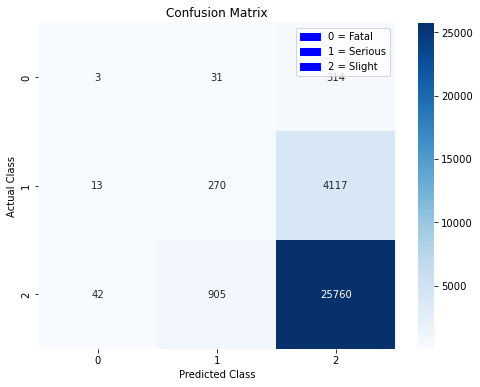

In [66]:
confusion_matrix_knn(Features, TargetVariable)


# Confusion Matrix - Naive Bay

In [63]:

def confusion_matrix_naive_bayes(Features, TargetVariable):
   
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(Features, TargetVariable, test_size=0.25, random_state=42)

    # Initialize the Naive Bayes model
    naive_bayes = GaussianNB()

    # Train the Naive Bayes model
    naive_bayes.fit(X_train, y_train)

    # Evaluate the Naive Bayes model on the test set
    y_pred = naive_bayes.predict(X_test)

    # Create the confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    
    legend_labels = {
    0: 'Fatal',
    1: 'Serious',
    2: 'Slight'
    }

    
    sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    handles = [plt.Rectangle((0, 0), 1, 1, color='blue', label=f'{key} = {value}') for key, value in legend_labels.items()]
    plt.legend(handles=handles, loc='upper right')

    plt.show()



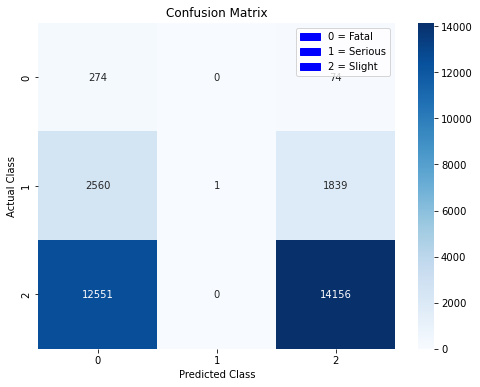

In [64]:
confusion_matrix_naive_bayes(Features, TargetVariable)


# Confusion Matrix -  Logistic Regression

In [67]:

def confusion_matrix_logistic(Features, TargetVariable):
   
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(Features, TargetVariable, test_size=0.25, random_state=42)

    # Initialize the Naive Bayes model
    naive_bayes = LogisticRegression()

    # Train the Naive Bayes model
    naive_bayes.fit(X_train, y_train)

    # Evaluate the Naive Bayes model on the test set
    y_pred = naive_bayes.predict(X_test)

    # Create the confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    legend_labels = {
    0: 'Fatal',
    1: 'Serious',
    2: 'Slight'
    }
    
    sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    handles = [plt.Rectangle((0, 0), 1, 1, color='blue', label=f'{key} = {value}') for key, value in legend_labels.items()]
    plt.legend(handles=handles, loc='upper right')
    plt.show()



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


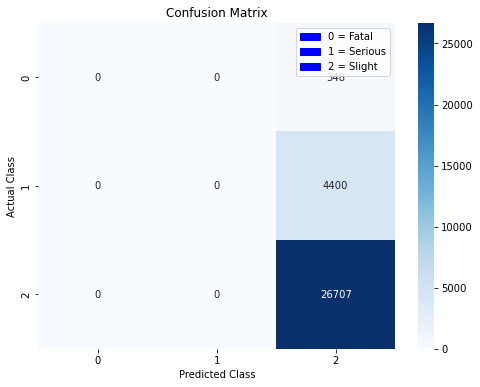

In [68]:
confusion_matrix_logistic(Features, TargetVariable)


# Confusion Matrix - Neural  Network

In [69]:

def confusion_matrix_network(Features, TargetVariable):
   
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(Features, TargetVariable, test_size=0.25, random_state=42)

    # Initialize the Naive Bayes model
    naive_bayes = MLPClassifier()

    # Train the Naive Bayes model
    naive_bayes.fit(X_train, y_train)

    # Evaluate the Naive Bayes model on the test set
    y_pred = naive_bayes.predict(X_test)

    # Create the confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Visualize the confusion matrix
    plt.figure(figsize=(8, 6))
    legend_labels = {
    0: 'Fatal',
    1: 'Serious',
    2: 'Slight'
    }
   

    
    sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    handles = [plt.Rectangle((0, 0), 1, 1, color='blue', label=f'{key} = {value}') for key, value in legend_labels.items()]
    plt.legend(handles=handles, loc='upper right')
    plt.show()



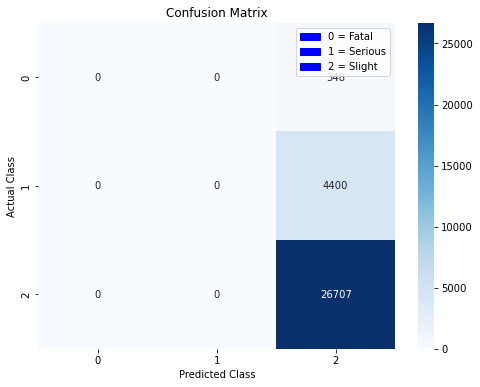

In [70]:
confusion_matrix_network(Features, TargetVariable)


-------------------------------------------------------------------------------------------------------------------------------

# ROC Curve - KNN

In [71]:
def plot_roc_curve_naive_knn(Features, TargetVariable):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(Features, TargetVariable, test_size=0.2, random_state=42)

    # Create a Naive Bayes classifier
    naive_bayes = KNeighborsClassifier()

    # Train the classifier
    naive_bayes.fit(X_train, y_train)

    # Predict probabilities for each class
    y_scores = naive_bayes.predict_proba(X_test)

    # Binarize the target labels
    y_test_bin = label_binarize(y_test, classes=np.unique(TargetVariable))
    n_classes = y_test_bin.shape[1]

    # Compute the false positive rate (FPR), true positive rate (TPR), and thresholds for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot the ROC curves for each class
    cmap = get_cmap('tab20')  # Choose a colormap that supports a larger number of classes
    plt.figure()

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], color=cmap(i), label='Class {} (area = {:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate ')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


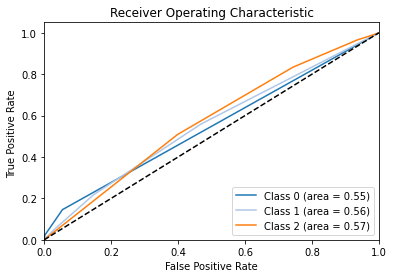

In [72]:
 plot_roc_curve_naive_knn(Features, TargetVariable)


# ROC Curve - Naive Bay

In [73]:
def plot_roc_curve_naive_bayes(Features, TargetVariable):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(Features, TargetVariable, test_size=0.2, random_state=42)

    # Create a Naive Bayes classifier
    naive_bayes = GaussianNB()

    # Train the classifier
    naive_bayes.fit(X_train, y_train)

    # Predict probabilities for each class
    y_scores = naive_bayes.predict_proba(X_test)

    # Binarize the target labels
    y_test_bin = label_binarize(y_test, classes=np.unique(TargetVariable))
    n_classes = y_test_bin.shape[1]

    # Compute the false positive rate (FPR), true positive rate (TPR), and thresholds for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot the ROC curves for each class
    cmap = get_cmap('tab20')  # Choose a colormap that supports a larger number of classes
    plt.figure()

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], color=cmap(i), label='Class {} (area = {:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate ')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


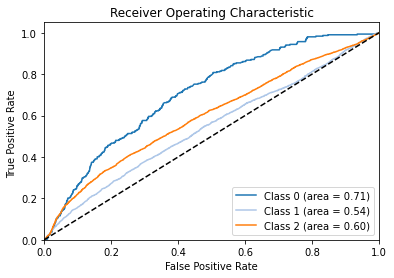

In [74]:
 plot_roc_curve_naive_bayes(Features, TargetVariable)


# ROC Curve - Logistic Regression


In [75]:
def plot_roc_curve_logistic(Features, TargetVariable):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(Features, TargetVariable, test_size=0.2, random_state=42)

    # Create a Naive Bayes classifier
    naive_bayes = LogisticRegression()

    # Train the classifier
    naive_bayes.fit(X_train, y_train)

    # Predict probabilities for each class
    y_scores = naive_bayes.predict_proba(X_test)

    # Binarize the target labels
    y_test_bin = label_binarize(y_test, classes=np.unique(TargetVariable))
    n_classes = y_test_bin.shape[1]

    # Compute the false positive rate (FPR), true positive rate (TPR), and thresholds for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot the ROC curves for each class
    cmap = get_cmap('tab20')  # Choose a colormap that supports a larger number of classes
    plt.figure()

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], color=cmap(i), label='Class {} (area = {:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate ')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


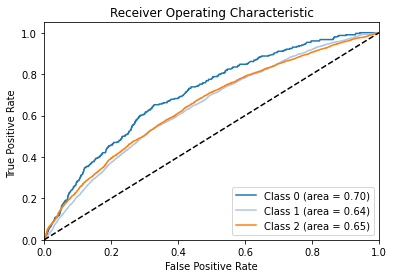

In [76]:
plot_roc_curve_logistic(Features, TargetVariable)


# ROC Curve - Neural Network

In [77]:
def plot_roc_curve_network(Features, TargetVariable):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(Features, TargetVariable, test_size=0.2, random_state=42)

    # Create a Naive Bayes classifier
    naive_bayes = MLPClassifier()

    # Train the classifier
    naive_bayes.fit(X_train, y_train)

    # Predict probabilities for each class
    y_scores = naive_bayes.predict_proba(X_test)

    # Binarize the target labels
    y_test_bin = label_binarize(y_test, classes=np.unique(TargetVariable))
    n_classes = y_test_bin.shape[1]

    # Compute the false positive rate (FPR), true positive rate (TPR), and thresholds for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot the ROC curves for each class
    cmap = get_cmap('tab20')  # Choose a colormap that supports a larger number of classes
    plt.figure()

    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], color=cmap(i), label='Class {} (area = {:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate ')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()


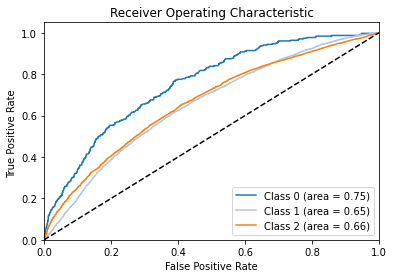

In [78]:
plot_roc_curve_network(Features, TargetVariable)


## Results

- KNN Area under the curve range from 0.55 - 0.57:
The Area Under Curve rsuggests that KNN has limited ability to separate positive and negative instances effectively.It means that the KNN algorithm might not accurately represent the distribution of classifications or the level of difficulty of the classification problem properly, resulting in poor results.

-Naive Bays Area under the curve range from 0.54 to 0.71:
Naive Bayes achieves a moderate to good level of performance in terms of separating the classes.The varying AUC range indicates that the degree of separation between classes varies across different Naive Bayes evaluation circumstances. In rare circumstances, the classes may be highly separated, resulting in larger AUC values. In other circumstances, the classes may have more overlap, resulting in lower AUC values.

-Logistic Regression Area under the curve range from 0.64 to 0.70:
The relatively narrow AUC range shows that the discriminative effectiveness of Logistic Regression is reasonably consistent across many evaluation conditions. The fact that the AUC values are reasonably close to one another suggests that the classifier's performance is robust.

-Neural Network Area under the curve range from 0.65 to 0.70:
Performs considerably well in distinguishing between positive and negative instances.Shows best results



# Learning Curve 

In [124]:
def plot_learning_curves(Features, TargetVariable, model):
    train_sizes, train_scores, test_scores = learning_curve(model, Features, TargetVariable, cv=2, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.001, 1.0, 20))

    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(12, 8))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color='g')
    plt.xlabel('Training Set Size')
    plt.ylabel('Error')
    plt.title('Learning Curves')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


# Learning Curve - KNN

In [128]:
model = KNeighborsClassifier()
plot_learning_curves(Features, TargetVariable, model)

KeyboardInterrupt: 

# Learning Curve - Naive Bays

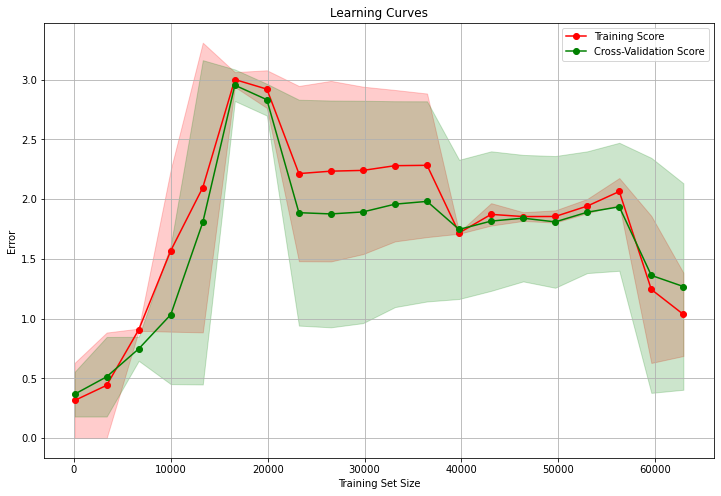

In [125]:
model = GaussianNB()
plot_learning_curves(Features, TargetVariable, model)

# Learning Curve - logistic Regression

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

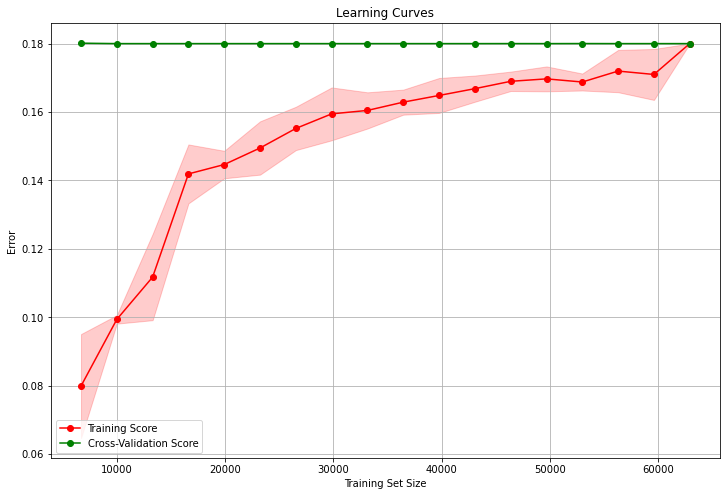

In [126]:
model = LogisticRegression()
plot_learning_curves(Features, TargetVariable, model)

# Learning Curve - Neural Network

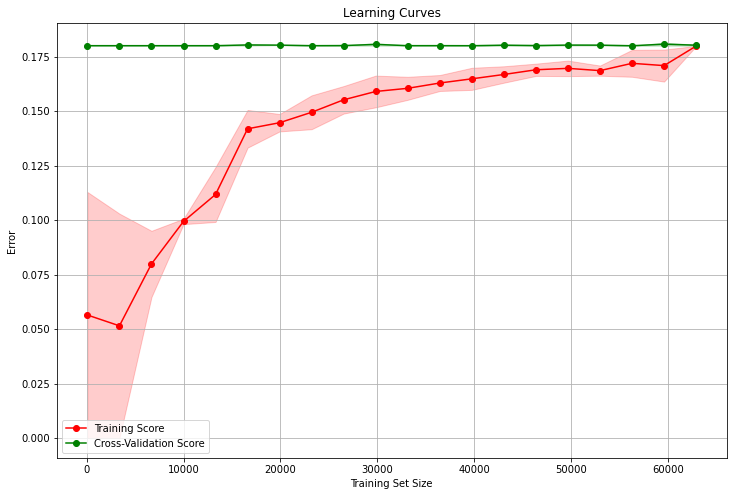

In [127]:
model = MLPClassifier()
plot_learning_curves(Features, TargetVariable, model)

# Results

* As shown above best data size to use for Naive Bays is 25,000 to 35,000
* For Logistic Regression Best data size around 50,000
* For Neural Network Best Data size around 50,000